## Example: Supervised Classification App

This will be a very simple example. Simple data. Simple model. Simple interface. But it also demonstartes what meets the minimum requirements for part C. We'll also demonstrate how things can progressively be improved. Always building on working code. So simple is a great place to start -scaling up is always easier than going the other direction.

Supervised classification fits the project requirments well, and is also a good place to start. The nature of your Data and organizational dictate which methods you can use. So what type of data do we need? 
[](TODO ADD LINK)

- One of those features is the category you want to predict (the dependent variable).
- At least one other features (the independent variable(s)).

Let's look at some data.

In [1]:
#We'll import libraires as needed, but when submitting, having them all at the top is best practice
import pandas as pd
# Load this well worn dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
df = pd.read_csv(url) #read CSV into Python as a dataframe
df # displays the dataframe

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


Opps. We've got the first row being used as headers. Some data sets have headers already -this one doesn't. How do I do that? Google [how to python add headers to dataframe](https://www.google.com/search?q=how+to+python+add+headers+to+dataframe&rlz=1C1GCEA_enUS995US997&ei=7TuSY7TmGsyJggfflr3YCg&ved=0ahUKEwj0kK_X4er7AhXMhOAKHV9LD6sQ4dUDCA8&uact=5&oq=how+to+python+add+headers+to+dataframe&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIGCAAQCBAeMgUIABCGAzIFCAAQhgMyBQgAEIYDMgUIABCGAzoKCAAQRxDWBBCwAzoHCAAQgAQQDToICAAQCBAeEA06CAgAEAgQBxAeSgQIQRgASgQIRhgAULgCWMkIYMEfaAFwAXgAgAFPiAH1A5IBATeYAQCgAQHIAQjAAQE&sclient=gws-wiz-serp). You'll need to learn a lot of micro skills -pick them up when needed. 

Following [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) we name the columns:

In [2]:
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv(url, names = column_names) #read CSV into Python as a dataframe
df # displays the dataframe

,sepal-length,sepal-width,petal-length,petal-width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


```{alarm}
**Your data doesn't look like this?** Different data might need different code. Don't *paste and pray*; adjust what you do according to what you have and need.    
```

Supervised methods use the answers in the data to supervise the model. Does our data contain the answer? If we want to predict the Iris 'type', than yes. It's the only categorical feature so that's what we'll go with. However, a supervised method could also predict any other feature, e.g., 'sepal-length.' A supervised method can't predict what it doesn't have, say plant height or petal color. 

Enough processing for now. Let's explore and see what we have. How many different Iris categories do we have?

In [3]:
num_types = df.groupby(by='type').size()
num_types

type
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Let's *visualize* that.

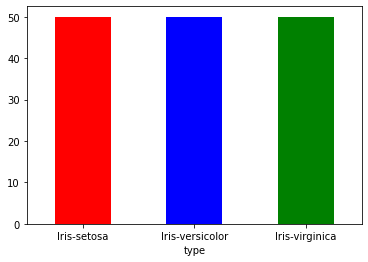

In [4]:
num_types.plot.bar(color=['red','blue','green'],rot=0);

```{margin}
Want to do something similar but different? Go to the [libary's docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html). You're going to see lots of different libraries and functions with lots of different options. Don't just copy and paste. Read the docs and understand the parameters.
```

Three evenly distributed categories. What about the distrubtion of the petal widths? As with most things in nature, we might expect it to be somewhat normal.

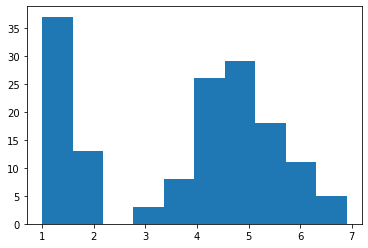

In [5]:
hist_petal_lengths = df['petal-length'].hist(grid = False,bins=10)

Not so normal. However, we are looking at all the petal lengths. Let's look at a single type.

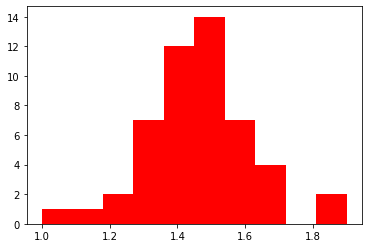

In [6]:
df_typeA = df[df['type'] == 'Iris-setosa']
df_typeA['petal-length'].hist(grid = False, color = 'red');

Aesthetics are not assessed, but Pandas visualizations are a bit limited compared to others. Below we get a much better picture of what's going on, and we can clealry see the three different types.

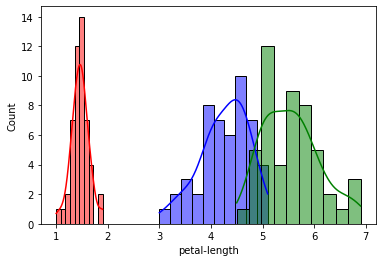

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

A = df[df['type'] == 'Iris-setosa']['petal-length']
B = df[df['type'] == 'Iris-versicolor']['petal-length']
C = df[df['type'] == 'Iris-virginica']['petal-length']

sns.histplot(A, color = 'red', kde=True, bins = 10)
sns.histplot(B, color ='blue', kde=True, bins = 10)
sns.histplot(C, color = 'green', kde=True, bins = 10)
plt.show()

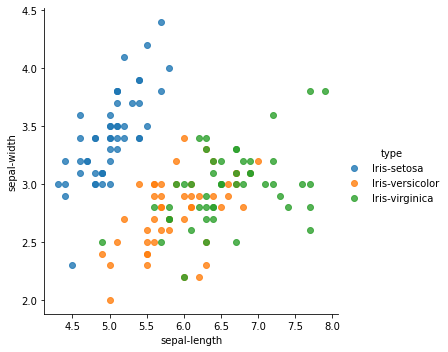

In [8]:
sns.lmplot(x='sepal-length', y='sepal-width', data=df, fit_reg=False, hue='type')
# Move the legend to an empty part of the plot
#plt.legend(loc='lower right')
plt.show()

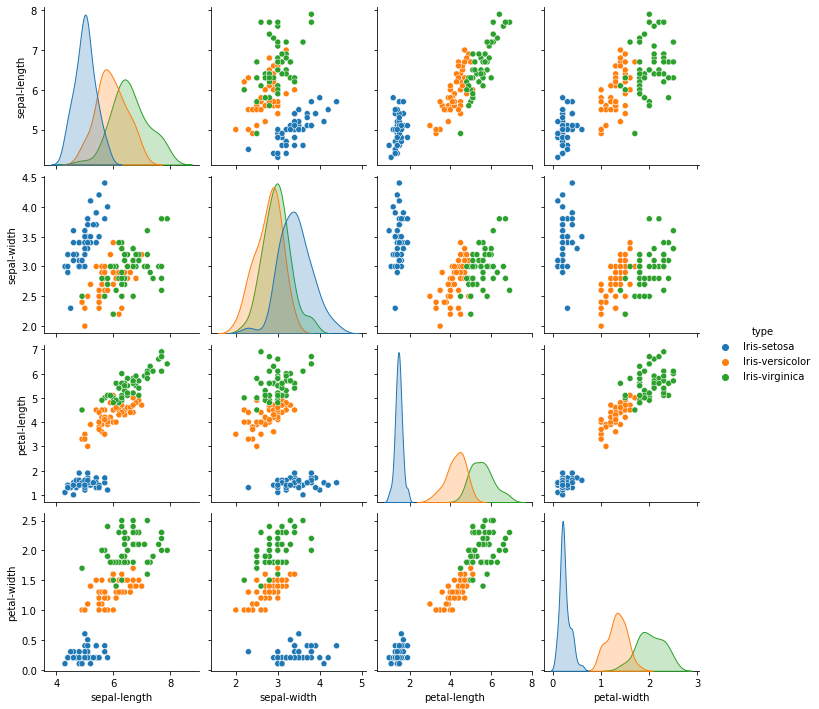

In [9]:
#correlogram
sns.pairplot(df, hue='type')
plt.show()

Each images is a descriptive method, and each is a visualization. And here is a non-visual description if the data

In [10]:
df.describe(include='all')

,sepal-length,sepal-width,petal-length,petal-width,type
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Play around -*explore*. 